## Import library dan dataset

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/data_traveloka.csv")

## Exploratory Data Analysis

In [ ]:
# cek overview dataset secara random
df.sample(3)

,Hotel Name,Original price,Price after discount,Tax,Rating,location
359,Adi Dharma Hotel Kuta,Rp 1.020.000,Rp 663.000,Inclusive of taxes,8.5,"Kuta, Bali"
562,Beluran Serene Guesthouse,Rp 399.999,Rp 299.999,Inclusive of taxes,8.6,"Kerambitan, Bali"
442,Agata Villas,Rp 9.161.796,Rp 3.226.541,Inclusive of taxes,7.3,"Seminyak, Bali"


In [ ]:
# total dimensi data
print("rows: {} dan cols: {}".format(df.shape[0], df.shape[1]))

rows: 1012 dan cols: 6


In [ ]:
# cek informasi dari tiap fitur pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            1012 non-null   object 
 1   Original price        1012 non-null   object 
 2   Price after discount  1012 non-null   object 
 3   Tax                   1012 non-null   object 
 4   Rating                876 non-null    float64
 5   location              1012 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.6+ KB


In [ ]:
# total data hotel dibali 
# total lokasi hotel dibali 
print('Jumlah data hotel dibali:', len(df['Hotel Name'].unique()))
print('Jumlah data lokasi hotel dibali:', len(df['location'].unique())) 

Jumlah data hotel dibali: 990
Jumlah data lokasi hotel dibali: 84


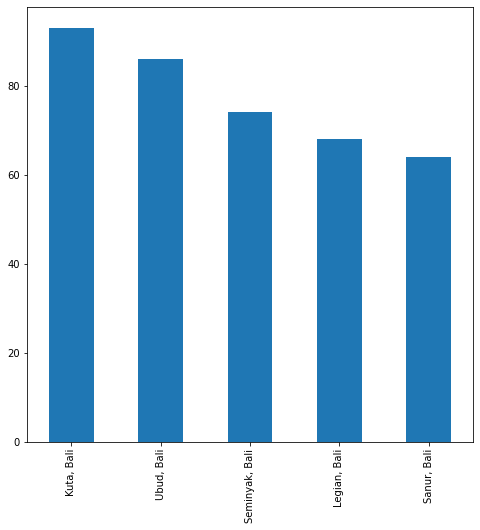

In [ ]:
# cek lokasi hotel terbanyak pada dataset
lokasi = df['location'].value_counts()[:5]
lokasi.plot(kind='bar', figsize=(8,8))

## Data Preprocessing

In [ ]:
# melihat missing value
Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Rating,136,13.438735
Hotel Name,0,0.000000
Original price,0,0.000000
Price after discount,0,0.000000
Tax,0,0.000000
location,0,0.000000


In [ ]:
# menghapus missing value pada dataset
df = df.dropna()

In [ ]:
# menghilangkan karakter unik pada dataset untuk dilakukan convert dataset
df['Original price'] = df['Original price'].str.replace('Rp ', '')
df['Original price'] = df['Original price'].str.replace('.', '')
df['Price after discount'] = df['Price after discount'].str.replace('Rp ', '')
df['Price after discount'] = df['Price after discount'].str.replace('.', '')
df['location'] = df['location'].str.replace(',', '')
df['location'] = df['location'].str.replace(' ', '')
df.head()

,Hotel Name,Original price,Price after discount,Tax,Rating,location
0,The Anvaya Beach Resort Bali,5022000,4017600,Inclusive of taxes,8.9,KutaBali
1,The Apurva Kempinski Bali,14520640,10890480,Inclusive of taxes,8.9,NusaDuaBeachBali
2,"The Westin Resort Nusa Dua, Bali",4001067,3000800,Inclusive of taxes,8.8,TheWestinResortNusaDuaBali
3,The Sakala Resort Bali - All Suites,2400000,1392000,Inclusive of taxes,8.5,TanjungBenoaBali
4,Discovery Kartika Plaza Bali,1733333,1300000,Inclusive of taxes,8.6,KutaBali


In [ ]:
# convert fitur dari object ke integer
cols = ['Original price', 'Price after discount'  ]

for col in cols:
  df[col] = df[col].astype('int')

In [ ]:
# cek statistika deskripsi pada fitur dataset
df.describe()

,Original price,Price after discount,Rating
count,8.760000e+02,8.760000e+02,876.000000
mean,1.923464e+06,1.280058e+06,8.432306
std,3.979703e+06,2.986545e+06,0.514494
min,6.333300e+04,4.750000e+04,5.600000
25%,3.800000e+05,2.500000e+05,8.200000
50%,8.380520e+05,5.499990e+05,8.500000
75%,1.942894e+06,1.262362e+06,8.800000
max,6.098050e+07,4.939420e+07,9.700000


In [ ]:
df = df.drop(columns='Tax')

In [ ]:
df.head()

,Hotel Name,Original price,Price after discount,Rating,location
0,The Anvaya Beach Resort Bali,5022000,4017600,8.9,KutaBali
1,The Apurva Kempinski Bali,14520640,10890480,8.9,NusaDuaBeachBali
2,"The Westin Resort Nusa Dua, Bali",4001067,3000800,8.8,TheWestinResortNusaDuaBali
3,The Sakala Resort Bali - All Suites,2400000,1392000,8.5,TanjungBenoaBali
4,Discovery Kartika Plaza Bali,1733333,1300000,8.6,KutaBali


In [ ]:
# validasi duplikat value
df1 = df.copy()
df1["is_duplicate"]= df1.duplicated()

df3 = []
duplikat = df1[df1['is_duplicate'] == True]
for i in duplikat['Hotel Name']:
  df3.append(df1[df1['Hotel Name'] == i])
out = pd.concat(df3,ignore_index = True)
out

,Hotel Name,Original price,Price after discount,Rating,location,is_duplicate
0,Bumi Linggah Villas Bali,1845375,830419,8.8,SukawatiBali,False
1,Bumi Linggah Villas Bali,1845375,830419,8.8,SukawatiBali,True
2,Dee Mansion,358938,183058,8.1,WestDenpasarBali,False
3,Dee Mansion,358938,183058,8.1,WestDenpasarBali,True
4,Fourteen Roses Boutique Hotel Kuta,810000,518400,8.1,LegianBali,False
5,Fourteen Roses Boutique Hotel Kuta,810000,518400,8.1,LegianBali,True
6,Jasmine Inn Nusa Penida,226667,170000,8.6,NusaPenidaBali,False
7,Jasmine Inn Nusa Penida,226667,170000,8.6,NusaPenidaBali,True
8,The Kryamaha Villas,2903987,1732499,8.8,TanahLotBali,False
9,The Kryamaha Villas,2903987,1732499,8.8,TanahLotBali,True


In [ ]:
# cek total data duplikat
df.duplicated().sum()

14

In [ ]:
# menghapus data duplikat pada dataset
df = df.drop_duplicates()

In [ ]:
df.sample(3)

,Hotel Name,Original price,Price after discount,Rating,location
747,City Garden Bali Dwipa Hotel,361932,224760,8.6,LegianBali
102,Stark Boutique Hotel and Spa Bali,1086869,597778,8.2,KutaBali
403,Hotel Gianyar,190000,142500,8.0,GianyarKotaBali


## Modelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tf.fit(df['location']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 


['abiansemalbali',
 'amedbali',
 'amlapurabali',
 'balianbali',
 'banjarbali',
 'batubulanbali',
 'baturitibali',
 'bedugulbali',
 'besakihbali',
 'candidasabali',
 'canggubali',
 'eastdenpasarbali',
 'gianyarkotabali',
 'gilimanukbali',
 'jatiluwihbali',
 'jimbaranbali',
 'kedewatanbali',
 'kemenuhbali',
 'keramasbali',
 'kerambitanbali',
 'kerobokanbali',
 'kintamanibali',
 'klungkungbali',
 'kutabali',
 'kutuhbali',
 'legianbali',
 'lovinabali',
 'margabali',
 'marriott',
 'medewibali',
 'mendoyobali',
 'mengwibali',
 'menjanganbali',
 'monkeyforestbali',
 'mundukbali',
 'negarabali',
 'northdenpasarbali',
 'nusaceninganbali',
 'nusaduabali',
 'nusaduabeachbali',
 'nusaduabeachhotel',
 'nusalembonganbali',
 'nusapenidabali',
 'padangbaibali',
 'payanganbali',
 'pecatubali',
 'pekutatanbali',
 'pemuteranbali',
 'penebelbali',
 'plagabali',
 'poppiesbali',
 'sanurbali',
 'sautographcollectionthestoneshotelbali',
 'sayanbali',
 'sebatubali',
 'selemadegbali',
 'semarapurakelodbali',
 '

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df['location']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(862, 83)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df['Hotel Name']
).sample(22, axis=1).sample(10, axis=0)

,sebatubali,sayanbali,kedewatanbali,sukawatibali,pekutatanbali,menjanganbali,thelagunaaluxurycollectionresort,tabanankotabali,selemadegbali,pemuteranbali,...,ungasanbali,bedugulbali,amedbali,plagabali,jatiluwihbali,southdenpasarbali,mundukbali,umalasbali,nusapenidabali,canggubali
Hotel Name,,,,,,,,,,,,,,,,,,,,,
Namastay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bali Asli Lodge by EPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jasmine Inn Nusa Penida,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aryaduta Bali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Wakanda Resort A Pramana Experience,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Radiant Hotel and Spa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Villa Seminyak Estate & Spa By Astadala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Royal Casa Ganesha Resort & Spa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Komaneka at Monkey Forest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Hotel Name'], columns=df['Hotel Name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (862, 862)


Hotel Name,CHEZ IDA,Bulan Bali Homestay & Hostel,Taman Surgawi Resort & Spa,Jati Hotel Negara,Hartaning House by Pramana Villas
Hotel Name,,,,,
Paisa Seminyak Living,0.0,0.0,0.0,0.0,0.0
Jay’s Villa Umalas,0.0,0.0,0.0,0.0,0.0
Alindra Villa,0.0,0.0,0.0,0.0,0.0
Bumi Linggah Villas Bali,0.0,0.0,0.0,0.0,0.0
The Kanjeng Hotel Kuta,0.0,0.0,0.0,0.0,0.0
Arimba at Bisma,1.0,1.0,0.0,0.0,1.0
The Pari Sudha,1.0,1.0,0.0,0.0,1.0
Fourteen Roses Boutique Hotel Kuta,0.0,0.0,0.0,0.0,0.0
OYO 90053 Paradise Inn,0.0,0.0,0.0,0.0,0.0


In [ ]:
# validasi hasil cosine similarity
df[df['Hotel Name'] == "CHEZ IDA"] 

,Hotel Name,Original price,Price after discount,Rating,location
943,CHEZ IDA,600001,450001,8.4,UbudBali


In [ ]:
# validasi hasil cosine similarity
df[df['Hotel Name'] == "The Pari Sudha"] 

,Hotel Name,Original price,Price after discount,Rating,location
334,The Pari Sudha,1554798,932879,8.7,UbudBali


In [ ]:
# membuat sebuah fungsi untuk menampilkan 5 data teratas hotel rekomendasi berdasarkan lokasi
def hotel_recommendations(nama_hotel, similarity_data=cosine_sim_df, items=df[['Hotel Name', 'location']], k=5):
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_hotel].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_hotel, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
# validasi hasil dari fungsi hotel_recommendations
df[df['Hotel Name'].eq('Matahari Bungalow')]

,Hotel Name,Original price,Price after discount,Rating,location
656,Matahari Bungalow,622618,290768,8.0,LegianBali


## Evaluation

In [ ]:
# menampilkan 5 data teratas rekomendasi hotel berdasarkan lokasi Legian, Bali
hotel_recommendations('Matahari Bungalow')

,Hotel Name,location
0,Ossotel Legian,LegianBali
1,The Legian 777,LegianBali
2,Nakula Stay Kuta,LegianBali
3,City Garden Bali Dwipa Hotel,LegianBali
4,Cempaka Losmen,LegianBali
